## 데이터 전처리
* ML 알고리즘은 데이터에 기반하고있음
* 데이터의 품질이 성능을 좌우함
* 데이터 전처리 과정은 알고리즘 만큼 중요

* 주요데이터 전처리 과정

> - 3주차 강의자료 참고

> - Data Encoding

> - Scaling

## LabelEncoder

In [2]:
# LabelEncoder 객체 생성
# LabelEncoder 객체의 fit 메서드에 카테고리 정보 인자로 전달하여 분석 수행
# LabelEncoder 객체의 transform 메서드를 이용해 인코딩 수행

from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'] 
encoder = LabelEncoder()

encoder.fit(items)   ## ascending sort 기준으로 정렬됨, 기준 변경 불가

labels = encoder.transform(items)
print('Label encoding result :', labels)



Label encoding result : [0 1 4 5 3 3 2 2]


In [7]:
encoder

LabelEncoder()

In [3]:
# 데이터분석(fit)을 통해 얻어진 카테고리의 유일한 클래스 정보 조회
print('Encoding classes : ', encoder.classes_)

Encoding classes :  ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [8]:
# 인코딩된 라벨값을 이용하여 해당 값의 클래스 정보 조회
print('Decoding values : ', encoder.inverse_transform([4, 5, 2, 0, 1, 3]))

Decoding values :  ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '선풍기']


## OneHotEncoder

In [10]:
# OneHotEncoder API 를활용한 카테고리 데이터 인코딩
# LabelEncoder API를 이용하여 카테고리 데이터 라벨 인코딩 수행
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']
encoder = LabelEncoder()

encoder.fit(items)
labels = encoder.transform(items)
print(labels)

# reshape(-1, 정수)
# 배열 x에 대해서 x.reshape(-1, 정수)를 해주면 '열(column)' 차원의 '정수'에 따라서 
# 원소가 빠짐없이 배치될 수 있도록 '-1'이 들어가 있는 '행(row)' 의 개수가 가변적으로 정해짐
labels = labels.reshape(-1, 1)
print(labels)


[0 1 4 5 3 3 2 2]
[[0]
 [1]
 [4]
 [5]
 [3]
 [3]
 [2]
 [2]]
[[0 1]
 [4 5]
 [3 3]
 [2 2]]


In [12]:
labels = labels.reshape(-1, 2)  ## reshape 이해해보기
print(labels)

labels = labels.reshape(-1, 1)  ## reshape 이해해보기
print(labels)

[[0 1]
 [4 5]
 [3 3]
 [2 2]]
[[0]
 [1]
 [4]
 [5]
 [3]
 [3]
 [2]
 [2]]


In [32]:
# OneHotEncoder 객체 생성
# OneHotEncoder 객체의 fit 메서드에 라벨 정보인자로 전달하여 분석 수행
# OneHotEncoder 객체의 transform 메서드를 이용해 인코딩 수행
# 인코딩 수행 결과 출력
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(labels)             ## labels의 형태를 위의 과정처럼 reshape 해줘야되는 이유????
one_hot_labels = one_hot_encoder.transform(labels)

# Scipy 압축 희소 행렬 : scipy.sparse.csr.csr_matrix
# 희소 행렬이란 행렬의 값이 대부분 0인 경우
# Compressed sparse row (CSR or CRS) : 가로의 순서대로 재정렬하는 방법으로 행에 관여하여 정리 압축한 것을 CSR라고 함
print(one_hot_labels)
print(type(one_hot_labels), '\n\n')

# Numpy 배열로 변환 : scipy.sparse.csr_matrix.toarray()
print(one_hot_labels.toarray())
print(type(one_hot_labels.toarray()), '\n\n')

import pandas as pd
data = pd.DataFrame(data = one_hot_labels.toarray(), columns=  encoder.classes_ )
print(data)




  (0, 0)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 2)	1.0
<class 'scipy.sparse.csr.csr_matrix'> 


[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
<class 'numpy.ndarray'> 


    TV  냉장고   믹서  선풍기  전자렌지  컴퓨터
0  1.0  0.0  0.0  0.0   0.0  0.0
1  0.0  1.0  0.0  0.0   0.0  0.0
2  0.0  0.0  0.0  0.0   1.0  0.0
3  0.0  0.0  0.0  0.0   0.0  1.0
4  0.0  0.0  0.0  1.0   0.0  0.0
5  0.0  0.0  0.0  1.0   0.0  0.0
6  0.0  0.0  1.0  0.0   0.0  0.0
7  0.0  0.0  1.0  0.0   0.0  0.0


In [41]:
## one hot encording 2번째 방법   : pd.get_dummies()

import pandas as pd
items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']
price = [1000, 100, 500, 1000, 200, 200, 50, 50]

data_df = pd.DataFrame({'아이템' : items, '가격' : price})
print(data_df, '\n')

data_df_ohe = pd.get_dummies(data_df, prefix='아이템', prefix_sep='_')

print(data_df_ohe)




    아이템    가격
0    TV  1000
1   냉장고   100
2  전자렌지   500
3   컴퓨터  1000
4   선풍기   200
5   선풍기   200
6    믹서    50
7    믹서    50 

     가격  아이템_TV  아이템_냉장고  아이템_믹서  아이템_선풍기  아이템_전자렌지  아이템_컴퓨터
0  1000       1        0       0        0         0        0
1   100       0        1       0        0         0        0
2   500       0        0       0        0         1        0
3  1000       0        0       0        0         0        1
4   200       0        0       0        1         0        0
5   200       0        0       0        1         0        0
6    50       0        0       1        0         0        0
7    50       0        0       1        0         0        0


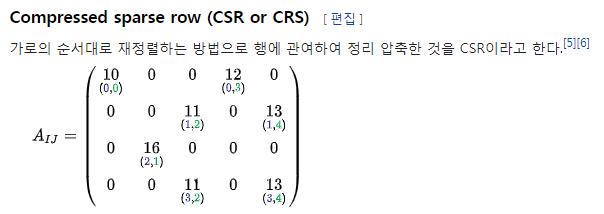

* 1주차 강의자료 머신러닝 개요와 파이썬 라이브러리 소개 p.23-24

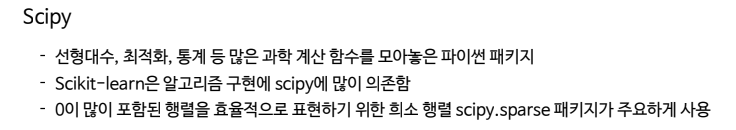

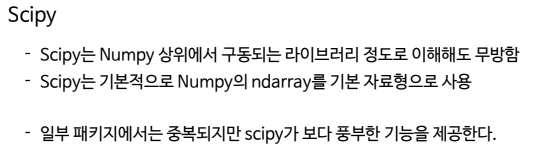

## Scaling

* 데이터 값의 범위를 일정한 수준으로 변환하는 전처리 기법

* 대표적인 방법

> - Standardization(표준화) : 평균이 ‘0’, 분산 ‘1’ 인 Gaussian Normal Distribution 으로 변환

> - Normalization(정규화) : 서로 다른 스케일의 데이터 크기를 통일


## Standardization(표준화)
* 평균이 ‘0’,분산 ‘1’인 Gaussian Normal Distribution으로 변환

In [16]:
# StandardScaler API 사용 전 
# Iris 데이터의 평균과 분산 확인
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris() 
iris_data = iris.data
df_iris = pd.DataFrame(data=iris_data, columns=iris.feature_names)

# 분산(Variance) : 값들이 평균으로부터 얼마만큼 떨어져 분포하고 있는가를 나타냄
# 분산이 크면 평균에서 값들이 멀리 떨어져 있다는 의미
print('Average') 
print(df_iris.mean())
print('\nVariance') 
print(df_iris.var())
print('\nstd') 
print(df_iris.std())

Average
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

Variance
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

std
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


In [17]:
# StandardScaler API 사용 후
# StandardScaler 객체 생성
# StandardScaler 객체의 fit 메서드에 데이터를 전달하여 분석 수행 
# StandardScaler 객체의 transform 메서드를 이용해 표준화 수행
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  ## 정규화 객체 생성
scaler.fit(df_iris)        ## 범주형 변수가 포함되어 있다면 제거해줘야함!!!

scaled_iris = scaler.transform(df_iris)

In [18]:
# 표준화 수행된 데이터의 평균과 분산 출력
df_scaled_iris = pd.DataFrame(data = scaled_iris, columns=iris.feature_names)

print('Average') 
print(df_scaled_iris.mean())
print('\nVariance') 
print(df_scaled_iris.var())

# 평균은 0, 분산은 1에 매우 가깝게 맞춰진 것을 확인

Average
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

Variance
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [21]:

## e 지수 출력 X   : -1.690315e-15 이렇게 나오지 않도록 하기
pd.options.display.float_format = '{:.5f}'.format
print(df_scaled_iris.mean())


# e 지수 출력 O    : -1.690315e-15 이렇게 나오도록 하기 (원복시키기)
pd.reset_option('display.float_format')
print(df_scaled_iris.mean())

sepal length (cm)   -0.00000
sepal width (cm)    -0.00000
petal length (cm)   -0.00000
petal width (cm)    -0.00000
dtype: float64
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64


## Normalization(정규화)
* 서로 다른 스케일의 데이터의 크기를 통일
* Normalization을 쉽게 수행 할 수 있는 API
* 데이터의 값의 범위를 ‘0’~ ‘1‘ 사이로 변환
* 음수 존재 시 ‘-1’ ~ ‘1’ 사이로 변환

In [28]:
# MinMaxScaler 객체 생성
# MinMaxScaler 객체의 fit 메서드에 데이터를 전달하여 분석 수행 
# MinMaxScaler 객체의 transform 메서드를 이용해 정규화 수행

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (-1,1))       ## feature_range : min, max 설정 default = (0,1)
scaler.fit(df_iris)

scaled_iris = scaler.transform(df_iris)

In [29]:
# 표준화 수행된 데이터의 평균과 분산 출력

df_scaled_iris = pd.DataFrame(data = scaled_iris, columns=iris.feature_names)

print('Min value') 
print(df_scaled_iris.min())
print('\nMax value') 
print(df_scaled_iris.max())

Min value
sepal length (cm)   -1.0
sepal width (cm)    -1.0
petal length (cm)   -1.0
petal width (cm)    -1.0
dtype: float64

Max value
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [4]:



### 범주화와 정규화/표준화 연습해보기



## 범주화 
# 위 변수들 중 범주형 변수이면서, 숫자로 표기된 것은 없으므로 (있다면, 회귀분석시 혼선을 주기 때문에 개선 필요)
# 따라서, one hot encoding만 실시함
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

raw_data =  pd.read_csv(r'D:\대학원_데이터사이언스\스터디\주말 머신러닝 스터디\프로젝트\house_price\train.csv')
rev_data = raw_data.copy()
split_list = ['YearBuilt', 'YearRemodAdd', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
                      '1stFlrSF', '2ndFlrSF' , 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                      'FullBath', 'HalfBath', 'BedroomAbvGr','KitchenAbvGr', 'KitchenQual' , 'SalePrice']
split_data = rev_data[split_list]   


split_trf_data = split_data.copy()
scale_list = []
category_list = []



## 분류 
for i in range(len(split_data.columns)):
    if split_data[split_data.columns[i]].dtype == 'object':
        category_list.append(split_data.columns[i])

    else :
        scale_list.append(split_data.columns[i])
        
        
# one hot encoding

category_df = split_data[category_list]

for i in range(len(category_list)):
   
    category_df = pd.concat([category_df, pd.get_dummies(split_data[category_list[i]], prefix=category_list[i], prefix_sep='_')], axis= 1)
        
                   
    
print(category_df , category_df.info(), sep = '\n', end = '\n' )



## 정규화 (표준화는 미실시)
scaled_df = split_data[scale_list]

scaler = StandardScaler()  ## 정규화 객체 생성
scaler.fit(scaled_df)        ## 범주형 변수가 포함되어 있다면 제거해줘야함!!!
scaled_result_list = scaler.transform(scaled_df)


scaled_data = pd.DataFrame(data = scaled_result_list , columns = scale_list)
print(scaled_data)




split_trf_data = pd.concat([scaled_data, category_df ], axis = 1)
print(split_trf_data)
split_trf_data.to_excel('확인.xlsx')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Heating           1460 non-null   object
 1   HeatingQC         1460 non-null   object
 2   CentralAir        1460 non-null   object
 3   Electrical        1459 non-null   object
 4   KitchenQual       1460 non-null   object
 5   Heating_Floor     1460 non-null   uint8 
 6   Heating_GasA      1460 non-null   uint8 
 7   Heating_GasW      1460 non-null   uint8 
 8   Heating_Grav      1460 non-null   uint8 
 9   Heating_OthW      1460 non-null   uint8 
 10  Heating_Wall      1460 non-null   uint8 
 11  HeatingQC_Ex      1460 non-null   uint8 
 12  HeatingQC_Fa      1460 non-null   uint8 
 13  HeatingQC_Gd      1460 non-null   uint8 
 14  HeatingQC_Po      1460 non-null   uint8 
 15  HeatingQC_TA      1460 non-null   uint8 
 16  CentralAir_N      1460 non-null   uint8 
 17  CentralAir_Y  